In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

Read the data and save it in a data frame type.

In [28]:
match_away_team_df=pd.read_csv('MatchAwayTeamInfo.csv')
match_home_team_df=pd.read_csv('MatchHomeTeamInfo.csv')
event_df = pd.read_csv('MatchEventInfo.csv')
match_time_df=pd.read_csv('MatchTimeInfo.csv')
period_df=pd.read_csv('PeriodInfo.csv')
tournament_df=pd.read_csv('MatchTournamentInfo.csv')
power_df = pd.read_csv('PowerInfo.csv')


Remove missing values from data using forward fill strategy.

1- Get the number of players from the MatchHomeTeamInfo(df) and MatchAwayTeamInfo(df1).

In [41]:
all_player_ids = pd.concat([match_away_team_df['player_id'], match_home_team_df['player_id']])
num_players = len(all_player_ids.unique())
print("Total number of players:",num_players)


Total number of players: 2352


2. What is the average height of the players?

In [42]:
height_player_mean=pd.concat([match_away_team_df['height'],match_home_team_df['height']]).mean()
print("Average height of players:",height_player_mean)

Average height of players: 1.8193923530581142


According to the given information, the average height of the players in this series of matches is 1.82

3. Which player has the highest number of wins?

We need a dataframe containing the 'match_id' and 'winner_code'. We get this from event_df and call it 'winner_df'.

In [48]:
# event_df.dropna(inplace=True)
winner_df=event_df[['match_id','winner_code']]
winner_df

,match_id,winner_code
1,12260076,1.0
2,12260077,2.0
3,12260078,1.0
4,12260080,1.0
5,12260081,1.0
...,...,...
20278,12346486,2.0
20288,12360758,1.0
20289,12360760,2.0
20295,12361503,1.0


Then we need to have another dataframe containing 'match_id','name_player1', 'name_player2', presenting in each match which players are playing. We call the dataframe 'merged_player'.

In [51]:
merged_player = pd.merge(match_away_team_df, match_home_team_df, on='match_id',how='inner', suffixes=('_player1', '_player2'))
merged_player =merged_player [['match_id','name_player1', 'name_player2']]
merged_player 

,match_id,name_player1,name_player2
0,12260075,Lehečka J.,Nadal R.
1,12260076,Khachanov K.,Sinner J.
2,12260077,Alcaraz C.,Struff J.
3,12260078,Alcaraz C.,Rublev A.
4,12260078,Alcaraz C.,Rublev A.
...,...,...,...
26677,12384892,Gomez F.,Chazal M.
26678,12384975,Șerban R.,Bandecchi S.
26679,12385017,Pedretti T.,Ortenzi J.
26680,12385869,Fukuda S.,Masabayashi T.


Now by merging the 'winner_df' and 'mergerd_player_id' we can have a dataframe containing, in each match who plays and who wins(by winner_code). Then add a column named 'winner_name' which present the winner name considering the winner code and player_name field.

In [52]:
playerWinner = pd.merge(merged_player , winner_df, on='match_id', how='inner')
playerWinner['winner_name'] = playerWinner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)

# Determine which player wins the most matches
winner_counts = playerWinner['winner_name'].value_counts()
print("The player who wins the most matches is:", winner_counts.idxmax())


The player who wins the most matches is: Shang J.


4. What is the longest match recorded in terms of duration?

We use match_time_df that has the time information of matches. We first fill the 'Nan' values and remove the duplicated records.

In [57]:
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)

Then we seperate the columns for periods and obtain the sum of them. The next step get the maximum sum of times.

In [58]:

match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3]].sum(axis=1)
match_time_df.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
0,12260075,3463.0,3855.0,0.0,0.0,0.0,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,0.0,0.0,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,0.0,0.0,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,0.0,0.0,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,0.0,0.0,0.0,1.714483e+09,5382.0


We get the max and then find the corresponding match that has the maximum time duration. Then print the match with detail information.

In [61]:
longest_time=match_time_df['sumation_time_periods_match'].max()
longest_match=match_time_df.loc[(match_time_df['sumation_time_periods_match']==longest_time),:]
longest_match

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
13350,12346747,167761.0,3392.0,0.0,0.0,0.0,1.716382e+09,171153.0


According to the given information ,the longest match recorded in terms of duration is the match with match-id:12346747 with 171153ps or 16h

5. How many sets are typically played in a tennis match?

We use the power_df that has the number of sets for each match. We groupby the power_df by 'match_id' and then count the unique sets of a match.

In [12]:
power_df.head()
num_sets_per_match = power_df.groupby('match_id')['set_num'].nunique()
print(num_sets_per_match)

match_id
12260075    2
12260076    3
12260077    3
12260078    3
12260080    2
           ..
12384789    2
12384806    3
12384892    2
12384975    3
12385017    3
Name: set_num, Length: 6658, dtype: int64


6. Which country has produced the most successful tennis players?

We again need to merge tha dataframes for away info team and home info team. Then we merge the result with the 'winner_df' we created before. The result df called 'playerWinner' contains 'match_id', 'name_player1', 'name_player', 'country_player1', 'country_player2', 'winner_code' and 'winner_name'. We then add the 'winner_country' considering the 'winner_name'. Then we count the number of countries and take the maximum of them as the answer.

In [65]:
merged_player = pd.merge(match_away_team_df, match_home_team_df, on='match_id',how='inner', suffixes=('_player1', '_player2'))
merged_match_id_name_country=merged_player[['match_id','name_player1', 'name_player2','country_player1','country_player2']]

playerWinner = pd.merge(merged_match_id_name_country, winner_df, on='match_id', how='inner')

playerWinner['winner_name'] = playerWinner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)
playerWinner['winner_country'] = playerWinner.apply(lambda row: row['country_player1'] if row['winner_code'] == 1.0 else row['country_player2'], axis=1)

winner_country = playerWinner['winner_country'].value_counts()
print("The player who wins the most matches is:", winner_country.idxmax())



The player who wins the most matches is: Italy


7. What is the average number of aces per match?

We use period_info dataframes containing the 'statistic_name'. We select rows that their 'statistic_name' is 'aces'. Then we sum the 'home_value' and 'away_value'. The next step is to get the number pf matches by 'nunique' method. The average aces per match is get by dividing the total_aces by number of matches. 

In [14]:

aces_stats = period_df[period_df['statistic_name'] == 'aces']
total_aces = aces_stats['home_value'].sum() + aces_stats['away_value'].sum()

num_matches = event_df['match_id'].nunique()

# Calculate the average number of aces per match
average_aces_per_match = total_aces / num_matches

print(f"The average number of aces per match is {average_aces_per_match:.2f}.")

The average number of aces per match is 102.69.


8. Is there a difference in the number of double faults based on gender?

We need the concatenation of home team information df and away team information df. Then we join the resulted concat df with period_df on match_id. This gives us a dataframe contains matches with their players and the corresponding 'statistic_name' and other usefull information like 'gender'. We then get the mean of 'home_value' and 'away_value' groupby gender field.
To have a schematic view of the results we plot a histogram presenting the results seperated by gender. 

<Figure size 800x600 with 0 Axes>

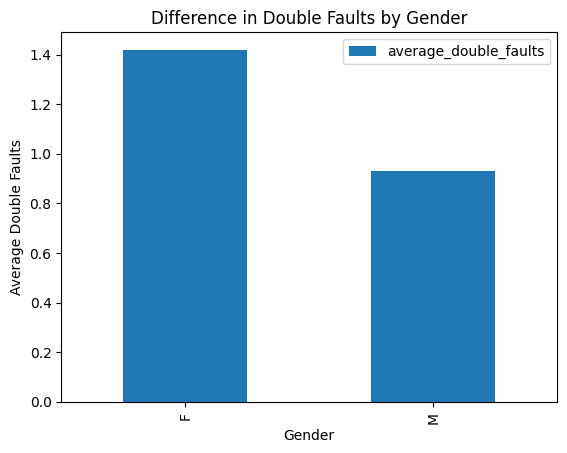

,gender,home_value,away_value,average_double_faults
0,F,1.378966,1.460493,1.419730
1,M,0.900220,0.963369,0.931795


In [66]:
players_id_concat = pd.concat([match_away_team_df, match_home_team_df])
period_df.fillna(0)

player_period_merged = pd.merge(players_id_concat, period_df, on='match_id')
double_faults_stats = player_period_merged[player_period_merged['statistic_name'] == 'double_faults']

gender_double_faults = double_faults_stats.groupby('gender')[['home_value', 'away_value']].mean().reset_index()
gender_double_faults['average_double_faults'] = (gender_double_faults['home_value'] + gender_double_faults['away_value']) / 2

plt.figure(figsize=(8, 6))
gender_double_faults.plot( x='gender', y='average_double_faults' ,kind='bar')

plt.xlabel('Gender')
plt.ylabel('Average Double Faults')
plt.title('Difference in Double Faults by Gender')
plt.show()

gender_double_faults


In conclusion of the given information, there is a difference between male and female in the number of double faults. The average double faults value is more in females than in males.

9. Which player has won the most tournaments in a single month?

We use the playerWinner dataframe previousely produced in question 3. It contains 'match_id', 'name_player1', 'name_player2' and 'winner_name' fields. Now we join this dataframe with the MatchTournamentInfo dataframe to get the player who won the most tournaments.

In [16]:

playerWinnerTourn = pd.merge(playerWinner, tournament_df, on='match_id', how='inner')
playerWinnerTourn=playerWinnerTourn[['match_id','name_player1','name_player2','tournament_id','winner_name']]
playerWinnerTourn

# Count the number of wins for each player
player_wins = playerWinnerTourn.groupby('winner_name').size().reset_index(name='wins')

# Sort the results by the number of wins in descending order
player_wins = player_wins.sort_values(by='wins', ascending=False)

# Print the player who wins the most tournaments
print("The player who wins the most tournaments is:", player_wins.iloc[0]['winner_name'])

The player who wins the most tournaments is: Shang J.


10. Is there a correlation between a player's height and their ranking?

Again we need a concatenation of home team information and away team information. We then use the 'height' column and the 'current_rank' columns to get the correlation using 'corr' method. 
To have a schematic view of the results we plot the scatter plot for the height and the mean of corresponding 'current rank'. The results show that there is no correlation between height and rank.

The correlation between height and ranking is:  0.10782530868262802


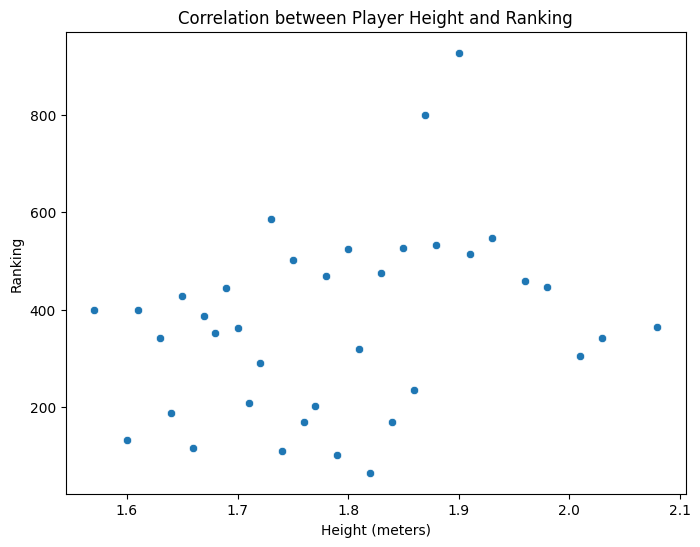

In [17]:
players_concat_df = pd.concat([match_away_team_df, match_home_team_df])
height_rank_correlation=players_concat_df['height'].corr(players_concat_df['current_rank'])

print("The correlation between height and ranking is: ", height_rank_correlation)

height_rank_mean = players_concat_df.groupby('height')['current_rank'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='current_rank', data=height_rank_mean)

plt.xlabel('Height (meters)')
plt.ylabel('Ranking')
plt.title('Correlation between Player Height and Ranking')
plt.show()

According to the scatter plot and height_rank_correlation value, it cannot be claimed that there is a correlation between players height and their rank.

11. What is the average duration of matches?

We use time_df that has the duration of each period. We then get the average by dividing this value on number of matches.

In [18]:
time_df=pd.read_csv('MatchTimeInfo.csv')
time_df.fillna(0,inplace=True)
total_duration = time_df['period_1'].sum() + time_df['period_2'].sum() + time_df['period_3'].sum()
num_matches = time_df['match_id'].nunique()

average_duration = total_duration / num_matches

print(f"The average duration of matches is {average_duration / 60:.2f} minutes.")

The average duration of matches is 182.77 minutes.


12. What is the average number of games per set in men's matches compared to women's matches?

We use power_df that has the match_id, the number of sets and number of games in each set, and the concatenation of home information team and away information team. 
We get the total games per set considering the maximum number of games.

In [69]:

power_player_id = pd.merge(power_df, players_id_concat, on='match_id')

total_games_per_set = power_player_id.groupby(['match_id', 'set_num', 'gender'])['game_num'].max()
total_games_per_set


match_id  set_num  gender
12260075  1        M         12
          2        M         10
12260076  1        M         12
          2        M          9
          3        M          9
                             ..
12384975  2        F         13
          3        F         10
12385017  1        F         10
          2        F         12
          3        F         12
Name: game_num, Length: 14406, dtype: int64

We compute the average number of games per set by mean method seperated with gender.

In [70]:
gender_games_per_set = total_games_per_set.groupby('gender').mean()

print(f"The average number of games per set in men's matches is {gender_games_per_set['M']:.2f}.")
print(f"The average number of games per set in women's matches is {gender_games_per_set['F']:.2f}.")

The average number of games per set in men's matches is 9.18.
The average number of games per set in women's matches is 8.92.


On average, in men's matches, each set has 18 games and in women's matches, each set has 17 games

13. What is the distribution of left-handed versus right-handed players?

We first clean the data of match away team and home away team then merge them. Then we use 'value_count' method to count the right-handed players and 'left-handed' players seperately.
To have a schematic view of resulted distribution of right-handed players versus left-handed players we plot a histogram. As it can be seen the left-handed players are less than right-handed, considerably.

The distribution of right-handed players versus left-handed: right-handed    11874
left-handed      1731
ambidextrous       14
Name: plays, dtype: int64
The percentage of the distribution of right-handed players versus left-handed: right-handed    87.187018
left-handed     12.710184
ambidextrous     0.102798
Name: plays, dtype: float64


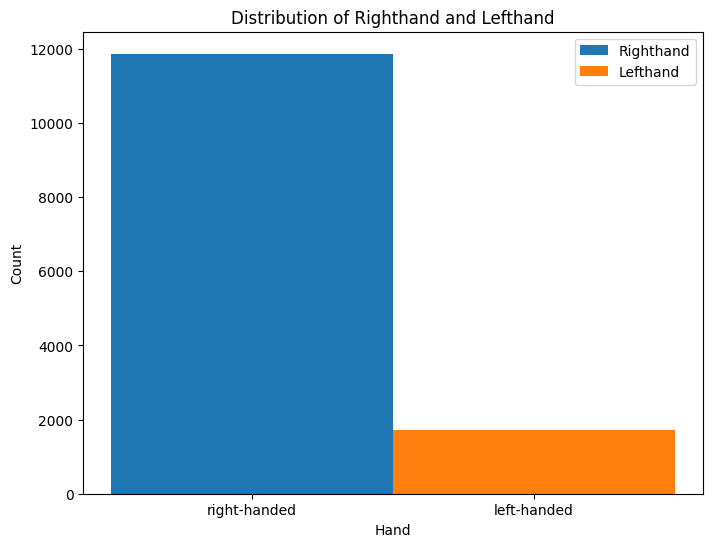

In [78]:
match_away_cleand_df = match_away_team_df.loc[match_away_team_df['plays'].notnull()]

match_home_cleand_df = match_home_team_df.loc[match_home_team_df['plays'].notnull()]


match_home_away_cleaned_df = pd.concat([match_away_cleand_df, match_home_cleand_df])
distribution = match_home_away_cleaned_df['plays'].value_counts()

print("The distribution of right-handed players versus left-handed:",distribution)

percentage_distribution = (distribution / len(match_home_away_cleaned_df)) * 100
print("The percentage of the distribution of right-handed players versus left-handed:",percentage_distribution)

# Draw a histogram to view the distribution
righthand_data = match_home_away_cleaned_df.loc[match_home_away_cleaned_df['plays'] == 'right-handed']
lefthand_data = match_home_away_cleaned_df.loc[match_home_away_cleaned_df['plays'] == 'left-handed']
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(righthand_data['plays'], bins=1, label='Righthand')
ax.hist(lefthand_data['plays'], bins=1, label='Lefthand')
ax.set_xlabel('Hand')
ax.set_ylabel('Count')
ax.set_title('Distribution of Righthand and Lefthand')

ax.legend()
plt.show()

14. What is the most common type of surface used in tournaments?

ground_type
Red clay             14238
Hardcourt outdoor     4606
Hardcourt indoor       241
Synthetic outdoor       93
Name: count, dtype: int64


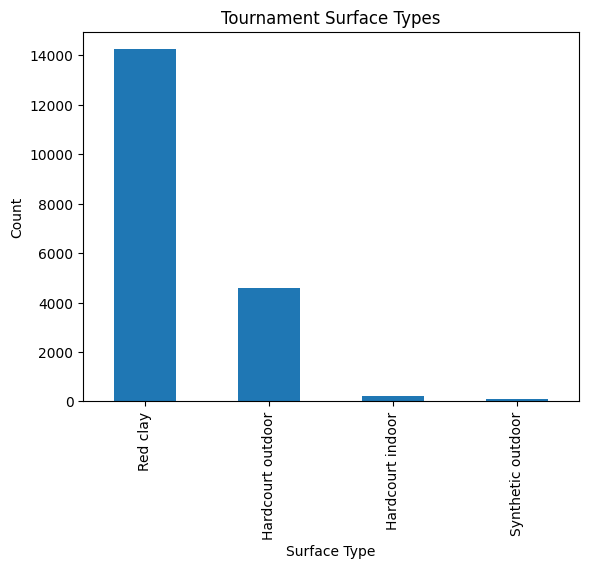

In [ ]:

tournament_df.drop_duplicates(inplace=True)
print(tournament_df['ground_type'].value_counts())

# drow plot
tournament_df['ground_type'].value_counts().plot(kind='bar')
plt.title('Tournament Surface Types')
plt.xlabel('Surface Type')
plt.ylabel('Count')
plt.show()

The most common type of surface used in the tournaments is 'Red clay' that used in '14237' tournaments

15. How many distinct countries are represented in the dataset?

In [ ]:
num_distinct_countries = match_home_away_cleaned_df['country'].nunique()

print(f"The dataset contains {num_distinct_countries} distinct countries.")

The dataset contains 78 distinct countries.


16. Which player has the highest winning percentage against top 10 ranked opponents?

In [ ]:
country_current_rank=pd.concat([match_away_team_df[['name','current_rank']],match_home_team_df[['name','current_rank']]]).sort_values('current_rank').drop_duplicates().dropna().iloc[0:12,:]
top_10_players=country_current_rank['name'].unique()

In [ ]:
game_info=pd.read_csv('GameInfo.csv')
point_count=game_info.iloc[:,[0,4,5]]
point_count.replace('A', pd.NA, inplace=True)
point_count['home_point'].fillna(0,inplace=True)
point_count['away_point'].fillna(0,inplace=True)
point_count['home_point'] = point_count['home_point'].astype(int)
point_count['away_point'] = point_count['away_point'].astype(int)

match_point_winner=point_count.groupby('match_id')[['home_point', 'away_point']].sum()
match_point_winner['winner_code'] = 0
match_point_winner.loc[match_point_winner['home_point'] > match_point_winner['away_point'], 'winner_code'] = 1
match_point_winner.loc[match_point_winner['home_point'] < match_point_winner['away_point'], 'winner_code'] = 2
match_winner=match_point_winner.iloc[:,[2]]

C:\Users\mahdi\AppData\Local\Temp\ipykernel_21324\3857551801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_count.replace('A', pd.NA, inplace=True)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_21324\3857551801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  point_count['home_point'].fillna(0,inplace=True)
C:\Users\mahdi\AppData\L

In [ ]:
merged_df = pd.merge(match_home_team_df, match_away_team_df, on='match_id', how='inner', suffixes=('_player1', '_player2'))
merged_df=merged_df[['match_id','name_player1', 'name_player2']]
player_winner = pd.merge(merged_df,match_winner, on='match_id', how='inner')
player_winner.drop_duplicates(inplace=True)

player_winner['winner_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)
player_winner['loser_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 2.0 else row['name_player2'], axis=1)
player_winner_loser=player_winner.iloc[:,[0,4,5]]
player_winner_loser

,match_id,winner_name,loser_name
0,12260075,Lehečka J.,Lehečka J.
1,12260076,Khachanov K.,Khachanov K.
2,12260077,Alcaraz C.,Alcaraz C.
3,12260078,Alcaraz C.,Alcaraz C.
5,12260080,Zverev A.,Zverev A.
...,...,...,...
27541,12384789,Léonard M.,Léonard M.
27542,12384806,Dutra da Silva D.,Dutra da Silva D.
27543,12384892,Gomez F.,Gomez F.
27544,12384975,Șerban R.,Șerban R.


In [ ]:
# Find the player with the highest winning percentage
top_10_matches =player_winner_loser[(player_winner_loser['loser_name'].isin(top_10_players))]
top_10_matches_winner=top_10_matches.iloc[:,[0,1]]

winner_counts = top_10_matches_winner['winner_name'].value_counts()
winner_percentages = (winner_counts / len(top_10_matches_winner)) * 100

player_with_highest_win = winner_percentages.idxmax()
highest_win_pct = winner_percentages.max()

print(f"The player with the highest winning percentage against top 10 ranked opponents is {player_with_highest_win}  ,with {highest_win_pct} percent win")
winner_counts


The player with the highest winning percentage against top 10 ranked opponents is Sabalenka A.  ,with 23.52941176470588 percent win


winner_name
Sabalenka A.      12
Ruud C.            7
Alcaraz C.         5
Medvedev D.        5
Rybakina E.        4
Rublev A.          4
Zheng Q.           4
Vondroušová M.     4
Sinner J.          3
Zverev A.          2
Gauff C.           1
Name: count, dtype: int64

17. What is the average number of breaks of serve per match? 
We use the dfPower dataframe(for PowerInfo table) previously read in question number 5.

In [ ]:
total_breaks = power_df['break_occurred'].sum()

num_matches = power_df['match_id'].nunique()

average_breaks_per_match = total_breaks / num_matches
print(f"the average is: ",average_breaks_per_match )

EXTRA QUESTION 1- Is there a correlation between a player's experience and their ranking?

In [ ]:
match_home_team_turned_rank_df=match_home_team_df.iloc[:,[17,10,14]]
match_away_team_turned_rank_df=match_away_team_df.iloc[:,[17,10,14]]
turned_rank_player=pd.concat([match_home_team_turned_rank_df,match_away_team_turned_rank_df])
turned_rank_player.drop_duplicates()
turned_rank_player.dropna(inplace=True)
turned_rank_player['experience'] = 2024-turned_rank_player['turned_pro']
turned_rank_player.drop(columns='turned_pro', inplace=True)
turned_rank_player.drop_duplicates(inplace=True)
turned_rank_player.sort_values('current_rank')

,full_name,current_rank,experience
498,"Swiatek, Iga",1.0,8.0
4570,"Djokovic, Novak",1.0,21.0
8,"Sabalenka, Aryna",2.0,9.0
1,"Sinner, Jannik",2.0,6.0
2,"Alcaraz, Carlos",3.0,6.0
...,...,...,...
5879,"Gabashvili, Teimuraz",1272.0,23.0
4822,"Uzhylovsky, Vladimir",1341.0,19.0
42,"Clezar, Guilherme",1365.0,15.0
3447,"Gabashvili, Teimuraz",1452.0,23.0


In [ ]:
experience_rank_correlation=turned_rank_player['experience'].corr(turned_rank_player['current_rank'])
if experience_rank_correlation <0.3:
    print('There is a weak correlation between players experience and there rank')
elif 0.3<experience_rank_correlation<0.5:
    print('There is a moderate correlation between players experience and there rank')
else:
    print('There is a strong correlation between players experience and there rank')

There is a weak correlation between players experience and there rank


EXTRA QUESTION 2- Is there a correlation between being right or left_hand and number of ranking?

In [ ]:
handedness_ranking = df_players.groupby('plays')['current_rank'].mean()

print(f"Right-handed players have an average ranking of {handedness_ranking['right-handed']:.2f}.")
print(f"Left-handed players have an average ranking of {handedness_ranking['left-handed']:.2f}.")

Right-handed players have an average ranking of 365.35.
Left-handed players have an average ranking of 372.34.


The results shows that being a right-handed player leads to have a better rank.

EXTRA QUESTION 3- Which 3_players who received the most prize money in tennis tournaments? 


In [ ]:
country_total_prize=pd.concat([match_away_team_df[['full_name','total_prize']],match_home_team_df[['full_name','total_prize']]]).drop_duplicates()
country_total_prize.groupby('full_name').sum().sort_values('total_prize',ascending=False).iloc[0:3,:]

,total_prize
full_name,
"Djokovic, Novak",455008686.0
"Nadal, Rafael",224653134.0
"Murray, Andy",107560350.0


EXTRA QUESTION 4- How does the average number of winners per match differ between hard and clay court surfaces?

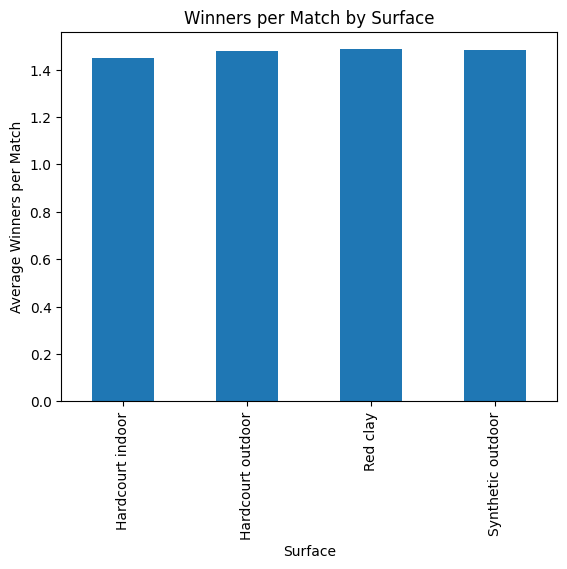

In [ ]:
# Join the df_event and df_period DataFrames on 'match_id'
df_combined = pd.merge(event_df, tournament_df, on='match_id')

# Calculate the average winners per match for each surface
surface_winners = df_combined.groupby('ground_type')['winner_code'].mean()

# Plot the average winners per match for each surface
surface_winners.plot(kind='bar')
plt.xlabel('Surface')
plt.ylabel('Average Winners per Match')
plt.title('Winners per Match by Surface')
plt.show()


EXTRA QUESTION 5- What is the number of winning matches for each player?

In [47]:
winner_counts = playerWinner['winner_name'].value_counts()
winner_counts

Shang J.           99
Delaney Ja.        72
Fonio G.           72
Justo G.           72
Kym J.             72
                   ..
Kukushkin M.        1
Björklund M.        1
Papamichail D.      1
Struff J.           1
Barrios Vera T.     1
Name: winner_name, Length: 441, dtype: int64

For example Melzer G. won 118 times in matches.

EXTRA QUESTION 6- 

In [22]:
player_counts = merged_df.groupby('country')['player_id'].count()

top_country = player_counts.idxmax()
num_players = player_counts.max()

print(f"The country with the most number of players is {top_country} with {num_players} players.")


NameError: name 'merged_df' is not defined